In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

In [25]:
training_df = pd.read_csv('final_dataset.csv')
pred = pd.read_csv('predicted_closes.csv')

In [26]:
training_df

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Close_MSFT,High_MSFT,Low_MSFT,Open_MSFT,...,AAPL_Rating_Change,AVGO_Rating_Change,CRM_Rating_Change,CSCO_Rating_Change,IBM_Rating_Change,MSFT_Rating_Change,NOW_Rating_Change,NVDA_Rating_Change,ORCL_Rating_Change,PLTR_Rating_Change
0,2023-04-24,163.679352,163.946660,162.253726,163.352645,41949600,277.358734,280.488972,274.356495,277.673732,...,1,1,1,1,1,1,1,1,1,1
1,2023-04-25,162.134933,164.649568,162.095324,163.540754,48714100,271.108154,277.191396,271.058919,275.134119,...,1,1,1,1,1,0,1,1,1,1
2,2023-04-26,162.125000,163.629828,161.174593,161.431992,45498800,290.745819,294.880078,288.147165,292.055014,...,1,1,1,1,1,1,1,1,1,1
3,2023-04-27,166.728592,166.877088,163.540739,163.540739,64902300,300.057709,300.421941,290.627702,291.336431,...,0,1,1,1,1,1,1,1,1,1
4,2023-04-28,167.985916,168.154232,166.203899,166.807810,55209200,302.449707,304.093546,298.561534,299.250587,...,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900,385.730011,391.890015,384.160004,388.510010,...,1,1,1,1,1,0,0,1,0,1
497,2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400,371.609985,381.609985,368.000000,380.670013,...,1,0,0,1,1,0,0,0,0,0
498,2025-04-17,196.979996,198.830002,194.419998,197.199997,51334300,367.779999,374.320007,366.890015,373.750000,...,1,1,1,0,1,1,1,0,1,1
499,2025-04-21,193.160004,193.800003,189.809998,193.270004,46742500,359.119995,364.480011,355.670013,362.820007,...,1,1,1,1,1,0,0,1,1,1


In [27]:
pred

,Stock,Predicted_Close
0,AAPL,196.491458
1,AVGO,166.716613
2,CRM,237.810313
3,CSCO,55.153815
4,IBM,238.841816
5,MSFT,364.194600
6,NOW,762.108975
7,NVDA,98.536683
8,ORCL,124.279114
9,PLTR,93.434661


In [38]:
pred_date = pd.to_datetime(training_df['Date'].max())+ dt.timedelta(days=2)

In [39]:
pred_date

Timestamp('2025-04-24 00:00:00')

In [31]:
from Features.feature_engg import get_unique_stocks
ticker_list = get_unique_stocks()

In [44]:
actual_data = yf.download(tickers=ticker_list,start=pred_date-dt.timedelta(days=10), end=dt.date.today(), period='1d')

[*********************100%***********************]  10 of 10 completed


In [45]:
actual_data

Price            Close                                                 \
Ticker            AAPL        AVGO         CRM       CSCO         IBM   
Date                                                                    
2025-04-14  202.520004  178.360001  254.550003  57.410000  239.059998   
2025-04-15  202.139999  178.949997  254.929993  57.200001  240.699997   
2025-04-16  194.270004  174.610001  249.839996  55.759998  238.570007   
2025-04-17  196.979996  170.990005  247.259995  55.759998  238.809998   
2025-04-21  193.160004  166.210007  236.259995  54.369999  236.220001   
2025-04-22  199.740005  169.580002  243.389999  55.040001  240.899994   
2025-04-23  204.600006  176.910004  250.479996  55.630001  245.479996   
2025-04-24  208.369995  188.149994  264.700012  56.290001  229.330002   
2025-04-25  209.279999  192.309998  267.850006  56.709999  232.410004   
2025-04-28  210.139999  192.470001  265.640015  56.840000  236.160004   
2025-04-29  211.701202  192.639999  268.000000  57.439999  239.774994   

Price                                                                   ...  \
Ticker            MSFT         NOW        NVDA        ORCL        PLTR  ...   
Date                                                                    ...   
2025-04-14  387.809998  799.820007  110.709999  134.639999   92.620003  ...   
2025-04-15  385.730011  816.500000  112.199997  133.940002   98.400002  ...   
2025-04-16  371.609985  796.659973  104.489998  129.759995   92.709999  ...   
2025-04-17  367.779999  772.159973  101.489998  128.619995   93.779999  ...   
2025-04-21  359.119995  755.989990   96.910004  122.820000   90.800003  ...   
2025-04-22  366.820007  766.830017   98.889999  127.239998   93.989998  ...   
2025-04-23  374.390015  812.700012  102.709999  131.399994  100.820000  ...   
2025-04-24  387.299988  938.570007  106.430000  137.509995  107.779999  ...   
2025-04-25  391.850006  945.260010  111.010002  138.490005  112.779999  ...   
2025-04-28  391.160004  937.409973  108.730003  140.139999  114.650002  ...   
2025-04-29  393.800110  940.715027  109.824997  140.889999  115.599998  ...   

Price          Volume                                                   \
Ticker           AAPL      AVGO      CRM      CSCO       IBM      MSFT   
Date                                                                     
2025-04-14  101352900  25748300  6038100  15657700   3321500  19251200   
2025-04-15   51343900  17242400  5227700  18543600   3363700  17199900   
2025-04-16   59732400  34638600  7190900  20551300   4869900  21967800   
2025-04-17   51334300  22501800  5564400  15874300   4626900  20943700   
2025-04-21   46742500  23469800  9240000  15578800   4908900  20807300   
2025-04-22   52976400  18504900  7145300  19961800   4232700  19485000   
2025-04-23   52929200  24380500  5818900  30231500   7948300  20545500   
2025-04-24   47311000  27576900  7857600  22782300  15428100  22232300   
2025-04-25   38222300  21242300  5651700  16493500   6700100  18973200   
2025-04-28   38652400  16362900  4968800  23101700   3646700  16536000   
2025-04-29   19137282   5713257  1847824   4864145   1935056   6482696   

Price                                                
Ticker          NOW       NVDA      ORCL       PLTR  
Date                                                 
2025-04-14  1717000  264705000   8217700  122836900  
2025-04-15  1735200  228966900   8630000  118457700  
2025-04-16  1869500  397016900   8295200  121997600  
2025-04-17  1803900  290833400   8919500   83991800  
2025-04-21  1668700  288501100  12201200   83831100  
2025-04-22  1582800  241004800  11233700   91185400  
2025-04-23  3019200  247526000   9528900  112909500  
2025-04-24  6083100  220815000   7305900  103190700  
2025-04-25  2887800  251064700   5476400  103933800  
2025-04-28  2049200  207051900   6970400  110664900  
2025-04-29   667456  102127146   2056435   58104988  

[11 rows x 50 columns]

In [2]:
final_df = pd.read_csv('final_dataset.csv')
sentiment_df = pd.read_csv('sentiment_score.csv')

In [9]:
# 1. Make sure Date is datetime and stripped to date only
sentiment_df["Date"] = pd.to_datetime(sentiment_df["Date"]).dt.date
final_df["Date"] = pd.to_datetime(final_df["Date"]).dt.date

# 2. Group by date and ticker to average sentiment
avg_sentiment = sentiment_df.groupby(["Date", "Stock_symbol"])["sentiment_score"].mean().reset_index()

# 3. Pivot to wide format
sentiment_pivot = avg_sentiment.pivot(index="Date", columns="Stock_symbol", values="sentiment_score")
sentiment_pivot.columns = [f"sentiment_{col}" for col in sentiment_pivot.columns]

# 4. Merge into final dataset
merged_df = pd.merge(final_df, sentiment_pivot, on="Date", how="left")


In [18]:
merged_df.head(107)


,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Close_MSFT,High_MSFT,Low_MSFT,Open_MSFT,...,MSFT_vs_NASDAQ_Ratio,NOW_vs_SP500_Ratio,NOW_vs_NASDAQ_Ratio,NVDA_vs_SP500_Ratio,NVDA_vs_NASDAQ_Ratio,ORCL_vs_SP500_Ratio,ORCL_vs_NASDAQ_Ratio,PLTR_vs_SP500_Ratio,PLTR_vs_NASDAQ_Ratio,sentiment_AAPL
0,2023-05-19,173.651062,174.870462,173.432956,174.870462,55772400,314.041199,314.445666,312.097800,312.462799,...,0.024810,0.121732,0.040315,0.007453,0.002468,0.023918,0.007921,0.002793,0.000925,NaN
1,2023-05-22,172.699310,173.204926,171.955771,172.481204,43570900,316.842865,318.233828,313.715689,314.297718,...,0.024908,0.121974,0.040201,0.007431,0.002449,0.023666,0.007800,0.002824,0.000931,NaN
2,2023-05-23,170.082077,171.886406,169.804490,171.638559,50747300,311.002808,318.362061,310.992933,315.708384,...,0.024761,0.120644,0.039819,0.007398,0.002442,0.023175,0.007649,0.003049,0.001006,NaN
3,2023-05-24,170.359634,170.934640,169.051014,169.616095,45143500,309.611847,312.226056,308.388571,310.479968,...,0.024800,0.122119,0.040255,0.007416,0.002445,0.023294,0.007678,0.002972,0.000980,NaN
4,2023-05-25,171.499771,172.401920,170.210967,170.924766,56058300,321.518860,322.485607,315.678789,318.875027,...,0.025320,0.128100,0.041879,0.009143,0.002989,0.024493,0.008007,0.003093,0.001011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2023-10-16,177.419647,177.777028,175.225720,175.463980,52517000,328.842896,332.302943,326.826174,327.271019,...,0.024237,0.126126,0.040657,0.010534,0.003396,0.024408,0.007868,0.003969,0.001279,NaN
103,2023-10-17,175.861069,177.121833,173.528176,175.364707,57549400,328.269470,329.653483,323.672557,325.827665,...,0.024256,0.129989,0.042004,0.010042,0.003245,0.024484,0.007912,0.004079,0.001318,NaN
104,2023-10-18,174.560577,176.287923,173.835893,174.302475,54764400,326.341705,331.759161,324.552369,328.694542,...,0.024511,0.127632,0.041360,0.009775,0.003168,0.024637,0.007984,0.003986,0.001292,NaN
105,2023-10-19,174.183365,176.546038,173.915325,174.759131,59302900,327.537964,333.034494,327.132640,328.358476,...,0.024839,0.130898,0.042467,0.009837,0.003191,0.024868,0.008068,0.003988,0.001294,NaN


In [20]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# ===== 1. Data Preparation =====
stock = "AAPL"
features = [f"Close_{stock}", f"sentiment_{stock}"]

# Drop rows with NaNs in selected columns
df = merged_df[["Date"] + features].dropna().copy()
df.set_index("Date", inplace=True)

# Scale both price and sentiment
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# ===== 2. Create Dataset Class =====
class StockDataset(Dataset):
    def __init__(self, data, window=4):
        self.X, self.y = [], []
        for i in range(len(data) - window):
            self.X.append(data[i:i+window])
            self.y.append(data[i+window][0])  # Predict Close price
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32).view(-1, 1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# ===== 3. Prepare Dataset =====
window_size = 4
dataset = StockDataset(scaled_data, window_size)

# Train-test split: train on all but last, test on last
train_data = scaled_data[:-1]
test_input = torch.tensor(scaled_data[-window_size:], dtype=torch.float32).unsqueeze(0)

# Then pass only the training portion to StockDataset
train_dataset = StockDataset(train_data, window=window_size)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

# ===== 4. Define LSTM Model =====
class LSTMModel(nn.Module):
    def __init__(self, input_size=2, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        output, _ = self.lstm(x)
        return self.fc(output[:, -1, :])

# ===== 5. Initialize Model =====
model = LSTMModel(input_size=2)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ===== 6. Training Loop =====
model.train()
for epoch in range(30):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(X_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 5 == 0:
        print(f"Epoch {epoch} - Loss: {total_loss:.4f}")

# ===== 7. Predict Next Day =====
model.eval()
with torch.no_grad():
    pred_scaled = model(test_input).item()
    predicted_close = scaler.inverse_transform([[pred_scaled, 0]])[0][0]

print(f"\n📈 Predicted next Close price for {stock}: {predicted_close:.2f}")


Epoch 0 - Loss: 1.2785
Epoch 5 - Loss: 0.5234
Epoch 10 - Loss: 0.1396
Epoch 15 - Loss: 0.1608
Epoch 20 - Loss: 0.1372
Epoch 25 - Loss: 0.1217

📈 Predicted next Close price for AAPL: 190.74


In [22]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

# --- Load and Prepare Data ---
stock = "AAPL"
features = [f"Close_{stock}", f"sentiment_{stock}"]

df = merged_df[["Date"] + features].dropna().copy()
df.set_index("Date", inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# --- Custom Dataset Class ---
class StockDataset(Dataset):
    def __init__(self, data, window=4):
        self.X, self.y = [], []
        for i in range(len(data) - window):
            self.X.append(data[i:i+window])
            self.y.append(data[i+window][0])  # target = close
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32).view(-1, 1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# --- Data Loader ---
window_size = 4
train_data = scaled_data[:-1]
test_input = torch.tensor(scaled_data[-window_size:], dtype=torch.float32).unsqueeze(0)

train_dataset = StockDataset(train_data, window_size)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

# --- Transformer Model ---
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim=2, d_model=64, nhead=4, num_layers=2, dim_feedforward=128):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_proj(x)          # [B, T, D]
        x = self.transformer(x)         # [B, T, D]
        return self.output_layer(x[:, -1])  # Use last time step's output

# --- Training ---
model = TimeSeriesTransformer(input_dim=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

model.train()
for epoch in range(30):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(X_batch)
        loss = loss_fn(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 5 == 0:
        print(f"[Transformer] Epoch {epoch} - Loss: {total_loss:.4f}")

# --- Final Prediction ---
model.eval()
with torch.no_grad():
    pred_scaled = model(test_input).item()
    predicted_price = scaler.inverse_transform([[pred_scaled, 0]])[0][0]

print(f"\nPredicted next close price for {stock}: ${predicted_price:.2f}")


[Transformer] Epoch 0 - Loss: 2.1327
[Transformer] Epoch 5 - Loss: 0.0677
[Transformer] Epoch 10 - Loss: 0.0543
[Transformer] Epoch 15 - Loss: 0.0288
[Transformer] Epoch 20 - Loss: 0.0411
[Transformer] Epoch 25 - Loss: 0.0376

Predicted next close price for AAPL: $197.52


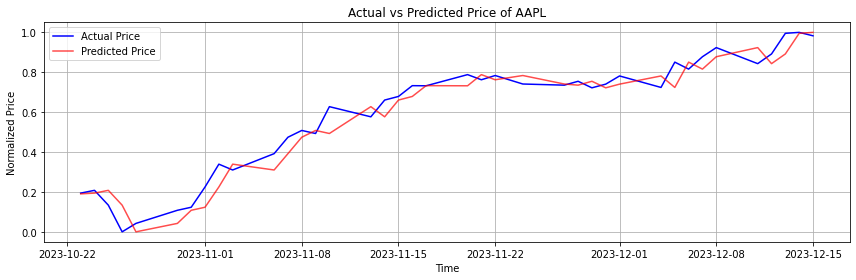

In [24]:
# Focus on AAPL price and sentiment
stock = "AAPL"
price_col = f"Close_{stock}"
sentiment_col = f"sentiment_{stock}"

# Drop rows with missing values
df = merged_df[["Date", price_col, sentiment_col]].dropna().copy()

# Normalize using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[[price_col, sentiment_col]])
df_scaled = pd.DataFrame(scaled, columns=[price_col, sentiment_col])
df_scaled["Date"] = df["Date"].values

# Create simple prediction: next-day price equals today's (naive benchmark)
df_scaled["Predicted"] = df_scaled[price_col].shift(1)

# Drop initial NA
df_plot = df_scaled.dropna().copy()

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df_plot["Date"], df_plot[price_col], label="Actual Price", color="blue")
plt.plot(df_plot["Date"], df_plot["Predicted"], label="Predicted Price", color="red", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.title(f"Actual vs Predicted Price of {stock}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

actual_prices = df_plot["Close_AAPL"].values
predicted_prices = df_plot["Predicted"].values

# Reverse MinMax Scaler
actual_prices = scaler.inverse_transform(df_plot[[price_col, sentiment_col]])[:, 0]
predicted_prices = scaler.inverse_transform(
    pd.concat([df_plot[["Predicted"]], df_plot[[sentiment_col]]], axis=1)
)[:, 0]

# Accuracy metrics
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 1.5985
Mean Squared Error (MSE): 3.9093
Root Mean Squared Error (RMSE): 1.9772
R² Score: 0.9517
